# ResNet50

In [1]:
import tensorflow as tf
import numpy as np 
from PIL import Image

model = tf.saved_model.load('/kaggle/input/resnet50-noteshieldbd/ResNet50')
classes = [ "fake" ,  "real" , ]

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
Id=[]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/train'):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))
Id[:5]

['/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/train/fake/note_529_4_76f3bc18668b4b399de603d3bc45390b.jpg',
 '/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/train/fake/note_553_5_1d126bfa4f62434baf99bfe149854cc3.jpg',
 '/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/train/fake/note_508_1_80aed6fc61384f08aaa5ee598969034c.jpg',
 '/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/train/fake/note_179_2_f3d4ce98358a4185b229dd0b89d7c5d3.jpg',
 '/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/train/fake/note_373_2_922aa181a0294bfaaa286be9a61aec60.jpg']

In [3]:
train=pd.DataFrame()
train=train.assign(filename=Id)
train.head()

filename
0  /kaggle/input/noteshieldbd-bangladeshi-banknot...
1  /kaggle/input/noteshieldbd-bangladeshi-banknot...
2  /kaggle/input/noteshieldbd-bangladeshi-banknot...
3  /kaggle/input/noteshieldbd-bangladeshi-banknot...
4  /kaggle/input/noteshieldbd-bangladeshi-banknot...

In [4]:
train['label']=train['filename']
train['label']=train['label'].str.replace('/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/train/','')
train.head()

filename  \
0  /kaggle/input/noteshieldbd-bangladeshi-banknot...   
1  /kaggle/input/noteshieldbd-bangladeshi-banknot...   
2  /kaggle/input/noteshieldbd-bangladeshi-banknot...   
3  /kaggle/input/noteshieldbd-bangladeshi-banknot...   
4  /kaggle/input/noteshieldbd-bangladeshi-banknot...   

                                               label  
0  fake/note_529_4_76f3bc18668b4b399de603d3bc4539...  
1  fake/note_553_5_1d126bfa4f62434baf99bfe149854c...  
2  fake/note_508_1_80aed6fc61384f08aaa5ee59896903...  
3  fake/note_179_2_f3d4ce98358a4185b229dd0b89d7c5...  
4  fake/note_373_2_922aa181a0294bfaaa286be9a61aec...

In [5]:
train['label'] = train['label'].str.split('/').str[0]
train.head()

filename label
0  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake
1  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake
2  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake
3  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake
4  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake

In [6]:
Id=[]
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/test'):
    for filename in filenames:
        Id.append(os.path.join(dirname, filename))
Id[:5]

['/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/test/fake/note_210_3_e80a59887824478fb6dc5c65e570139c.jpg',
 '/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/test/fake/note_004_1_5d0f3c149bd54604bdd34f048d08a56e.jpg',
 '/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/test/fake/note_117_5_63f5e150bc39414ea52a50c46f2135ac.jpg',
 '/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/test/fake/note_105_1_8f17449f332e491e8dbc29e3c6ccf0ac.jpg',
 '/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/test/fake/note_266_4_ebc01b0951844cabbca61e7497587ede.jpg']

In [7]:
test=pd.DataFrame()
test=test.assign(filename=Id)
test.head()

filename
0  /kaggle/input/noteshieldbd-bangladeshi-banknot...
1  /kaggle/input/noteshieldbd-bangladeshi-banknot...
2  /kaggle/input/noteshieldbd-bangladeshi-banknot...
3  /kaggle/input/noteshieldbd-bangladeshi-banknot...
4  /kaggle/input/noteshieldbd-bangladeshi-banknot...

In [8]:
test['label']=test['filename']
test['label']=test['label'].str.replace('/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/test/','')
test.head()

filename  \
0  /kaggle/input/noteshieldbd-bangladeshi-banknot...   
1  /kaggle/input/noteshieldbd-bangladeshi-banknot...   
2  /kaggle/input/noteshieldbd-bangladeshi-banknot...   
3  /kaggle/input/noteshieldbd-bangladeshi-banknot...   
4  /kaggle/input/noteshieldbd-bangladeshi-banknot...   

                                               label  
0  fake/note_210_3_e80a59887824478fb6dc5c65e57013...  
1  fake/note_004_1_5d0f3c149bd54604bdd34f048d08a5...  
2  fake/note_117_5_63f5e150bc39414ea52a50c46f2135...  
3  fake/note_105_1_8f17449f332e491e8dbc29e3c6ccf0...  
4  fake/note_266_4_ebc01b0951844cabbca61e7497587e...

In [9]:
test['label'] = test['label'].str.split('/').str[0]
test.head()

filename label
0  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake
1  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake
2  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake
3  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake
4  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake

In [10]:
result=[]
for i in test.filename:
    img = Image.open(i).convert('RGB')
    img = img.resize((300, 300 * img.size[1] // img.size[0]), Image.ANTIALIAS)
    inp_numpy = np.array(img)[None]
    inp = tf.constant(inp_numpy, dtype='float32')
    class_scores = model(inp)[0].numpy()
    result.append(classes[class_scores.argmax()])
result[:5]

/tmp/ipykernel_32/564266034.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((300, 300 * img.size[1] // img.size[0]), Image.ANTIALIAS)


['fake', 'fake', 'fake', 'fake', 'fake']

In [11]:
test=test.assign(prediction=result)
test.head()

filename label prediction
0  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake       fake
1  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake       fake
2  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake       fake
3  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake       fake
4  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake       fake

In [12]:
result=[]
for i in train.filename:
    img = Image.open(i).convert('RGB')
    img = img.resize((300, 300 * img.size[1] // img.size[0]), Image.ANTIALIAS)
    inp_numpy = np.array(img)[None]
    inp = tf.constant(inp_numpy, dtype='float32')
    class_scores = model(inp)[0].numpy()
    result.append(classes[class_scores.argmax()])
result[:5]

/tmp/ipykernel_32/1967585974.py:4: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((300, 300 * img.size[1] // img.size[0]), Image.ANTIALIAS)


['fake', 'fake', 'fake', 'fake', 'fake']

In [13]:
train=train.assign(prediction=result)
train.head()

filename label prediction
0  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake       fake
1  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake       fake
2  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake       fake
3  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake       fake
4  /kaggle/input/noteshieldbd-bangladeshi-banknot...  fake       fake

In [14]:
from sklearn.metrics import classification_report
print(classification_report(train['label'],train['prediction']))

              precision    recall  f1-score   support

        fake       0.98      0.91      0.94      2822
        real       0.94      0.99      0.96      3850

    accuracy                           0.96      6672
   macro avg       0.96      0.95      0.95      6672
weighted avg       0.96      0.96      0.95      6672



In [15]:
print(classification_report(test['label'],test['prediction']))

              precision    recall  f1-score   support

        fake       0.98      0.92      0.95       706
        real       0.94      0.99      0.96       962

    accuracy                           0.96      1668
   macro avg       0.96      0.95      0.96      1668
weighted avg       0.96      0.96      0.96      1668



# ResNet101

In [16]:
import tensorflow as tf
import numpy as np
from PIL import Image
import pandas as pd
import os
from sklearn.metrics import classification_report

# Load the ResNet101 model
model = tf.keras.applications.ResNet101(weights='imagenet', include_top=False)

171446536/171446536 [==============================] - 7s 0us/step


In [17]:
classes = ["fake", "real"]

In [18]:
def prepare_dataset(directory_path):
    Id = []
    # Walk through the directory to get file names
    for dirname, _, filenames in os.walk(directory_path):
        for filename in filenames:
            Id.append(os.path.join(dirname, filename))
    
    # Create a DataFrame
    df = pd.DataFrame()
    df = df.assign(filename=Id)
    
    # Extract labels from file paths
    df['label'] = df['filename'].str.replace(directory_path, '')
    df['label'] = df['label'].str.split('/').str[0]
    
    return df

# Prepare the train and test datasets
train = prepare_dataset('/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/train/')
test = prepare_dataset('/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/test/')

In [19]:
def get_classifier_model():
    # Placeholder: Load your actual classifier model here
    # This model should take the features from ResNet101 and output class probabilities
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(2048,)),  # Adjust the input shape based on the output of your ResNet101 features
        tf.keras.layers.Dense(len(classes), activation='softmax')
    ])
    return model

classifier_model = get_classifier_model()

In [20]:
def predict_images(df):
    result = []
    for i in df.filename:
        img = Image.open(i).convert('RGB')
        img = img.resize((224, 224), Image.LANCZOS)  # Resize image to match ResNet101 input size
        inp_numpy = np.array(img)[None] / 255.0  # Normalize the input
        inp = tf.constant(inp_numpy, dtype='float32')
        
        # Get the features from ResNet101
        features = model(inp, training=False)
        
        # Apply Global Average Pooling to transform the features into a vector
        pooled_features = tf.keras.layers.GlobalAveragePooling2D()(features)
        
        # Predict class probabilities with your classifier model
        class_probs = classifier_model(pooled_features)
        
        # Get the index of the highest probability class
        predicted_class_idx = np.argmax(class_probs)
        
        # Append the class name to the result list
        result.append(classes[predicted_class_idx])
    return result

In [21]:
train['prediction'] = predict_images(train)
test['prediction'] = predict_images(test)

In [22]:
print(classification_report(train['label'], train['prediction']))
print(classification_report(test['label'], test['prediction']))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        fake       0.00      0.00      0.00      2822
        real       0.58      1.00      0.73      3850

    accuracy                           0.58      6672
   macro avg       0.29      0.50      0.37      6672
weighted avg       0.33      0.58      0.42      6672

              precision    recall  f1-score   support

        fake       0.00      0.00      0.00       706
        real       0.58      1.00      0.73       962

    accuracy                           0.58      1668
   macro avg       0.29      0.50      0.37      1668
weighted avg       0.33      0.58      0.42      1668



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

# ResNet101 Enhanced

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import pandas as pd
import os

In [24]:
# Define classes and number of classes
classes = ["fake", "real"]
num_classes = len(classes)

In [25]:
# Load ResNet101 with fine-tuning options
def load_model():
    base_model = tf.keras.applications.ResNet101(include_top=False, weights='imagenet', input_tensor=tf.keras.Input(shape=(224, 224, 3)))
    base_model.trainable = True  # Fine-tune from this layer onwards
    fine_tune_at = 100  # Layer from which we want to fine-tune

    # Freeze all the layers before the `fine_tune_at` layer
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    return base_model

# Building the classifier
def get_classifier_model(base_model):
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

base_model = load_model()
classifier_model = get_classifier_model(base_model)

# Prepare dataset
def prepare_dataset(directory_path):
    filenames = [os.path.join(dp, f) for dp, dn, filenames in os.walk(directory_path) for f in filenames if os.path.splitext(f)[1].lower() in ['.png', '.jpg', '.jpeg']]
    labels = [f.split('/')[-2] for f in filenames]
    df = pd.DataFrame({'filename': filenames, 'label': labels})
    return df

train_df = prepare_dataset('/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/train/')
test_df = prepare_dataset('/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/test/')

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Train the model
history = classifier_model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator
)

# Evaluate the model
print("Evaluating the model on test data:")
results = classifier_model.evaluate(test_generator)
print(f"Test Loss, Test Accuracy: {results}")

# Generate classification reports
predictions = classifier_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
print(classification_report(true_classes, predicted_classes, target_names=classes))

Found 6672 validated image filenames belonging to 2 classes.
Found 1668 validated image filenames belonging to 2 classes.
Epoch 1/30
209/209 [==============================] - 169s 525ms/step - loss: 0.8421 - accuracy: 0.6042 - val_loss: 4.6644 - val_accuracy: 0.5767
Epoch 2/30
209/209 [==============================] - 108s 516ms/step - loss: 0.6700 - accuracy: 0.6605 - val_loss: 1468.7717 - val_accuracy: 0.4233
Epoch 3/30
209/209 [==============================] - 109s 522ms/step - loss: 0.5821 - accuracy: 0.7046 - val_loss: 1.8140 - val_accuracy: 0.5935
Epoch 4/30
209/209 [==============================] - 107s 513ms/step - loss: 0.5193 - accuracy: 0.7481 - val_loss: 2.4026 - val_accuracy: 0.5767
Epoch 5/30
209/209 [==============================] - 105s 504ms/step - loss: 0.4850 - accuracy: 0.7782 - val_loss: 2.6626 - val_accuracy: 0.5767
Epoch 6/30
209/209 [==============================] - 107s 513ms/step - loss: 0.4612 - accuracy: 0.7903 - val_loss: 3.3727 - val_accuracy: 0.5767

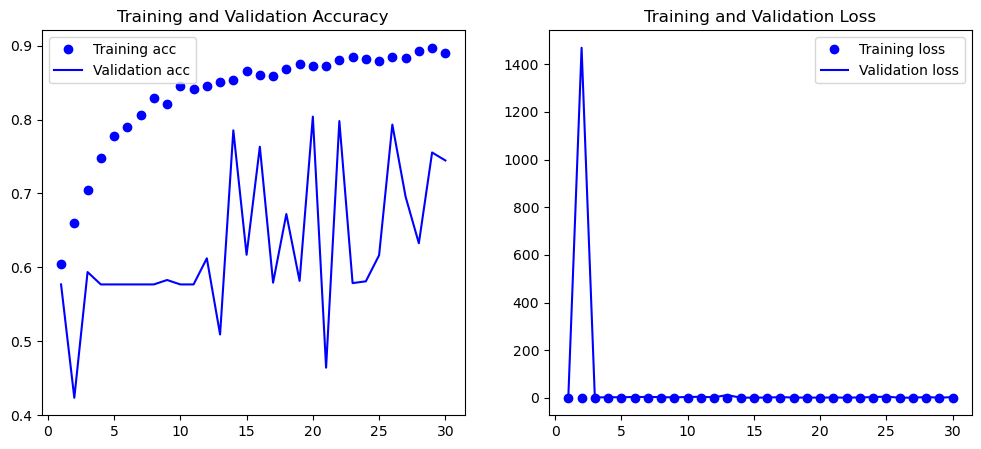

In [26]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    plt.show()

# Call this function with your history object after training
plot_training_history(history)

1/1 [==============================] - 2s 2s/step


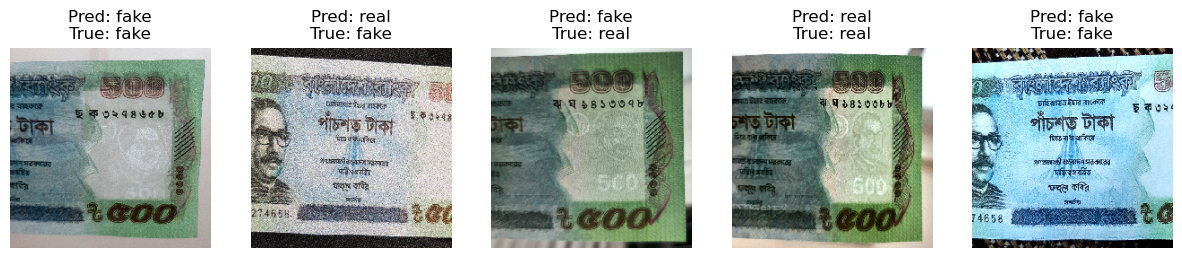

In [27]:
def display_prediction_examples(generator, model, num_images=5):
    # Get a batch of images from the generator
    for x_batch, y_batch in generator:
        break
    
    # Predict this batch
    preds = model.predict(x_batch)
    pred_classes = np.argmax(preds, axis=1)
    
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(x_batch[i])
        plt.title(f"Pred: {classes[pred_classes[i]]}\nTrue: {classes[np.argmax(y_batch[i])]}")
        plt.axis('off')
    plt.show()

# After your model training and evaluation, call this function
display_prediction_examples(test_generator, classifier_model)


53/53 [==============================] - 8s 153ms/step


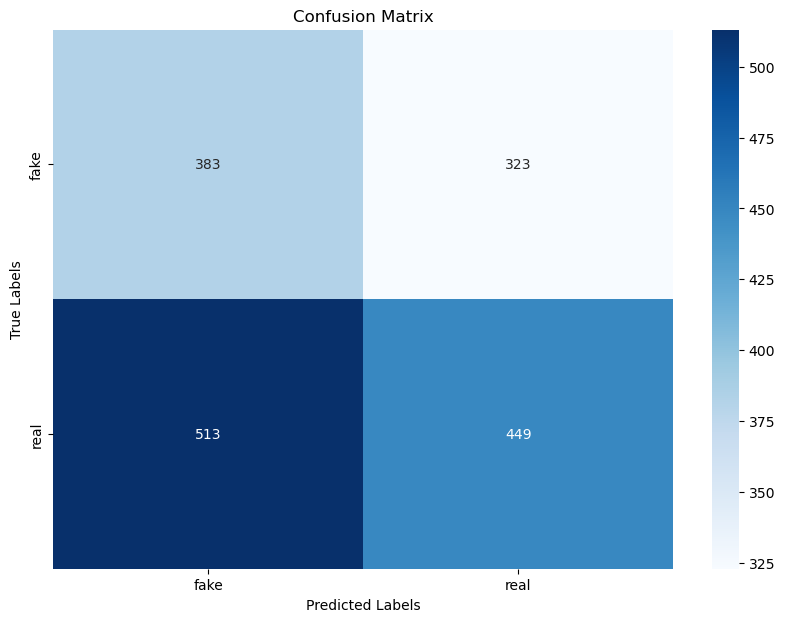

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Usage: you'll need to collect true labels and predicted labels from your test dataset
true_labels = test_generator.classes
predicted_labels = np.argmax(classifier_model.predict(test_generator), axis=1)
plot_confusion_matrix(true_labels, predicted_labels, classes)

53/53 [==============================] - 9s 160ms/step


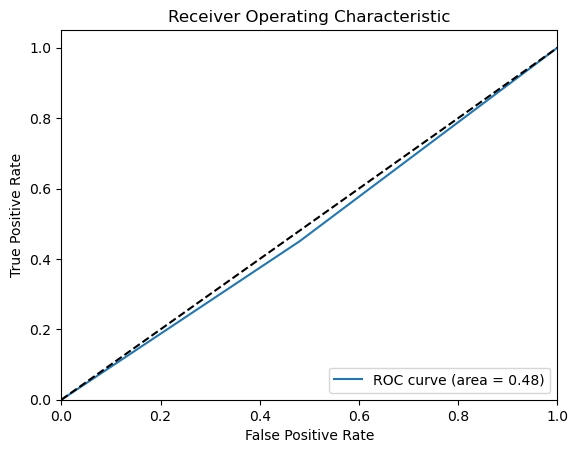

In [29]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def plot_binary_roc(y_true, y_pred, classes):
    # Binarize labels in a one-vs-all fashion if number of classes is 2
    y_true = label_binarize(y_true, classes=[0, 1])
    n_classes = y_true.shape[1]
    
    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_true.ravel(), y_pred.ravel())
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = {0:0.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Call the ROC plotting function
y_prob = classifier_model.predict(test_generator)
predicted_labels = np.argmax(y_prob, axis=1)
true_labels = test_generator.classes
plot_binary_roc(true_labels, predicted_labels, classes)


# DenseNet169

In [30]:
import tensorflow as tf
import numpy as np
from PIL import Image
import pandas as pd
import os
from sklearn.metrics import classification_report, accuracy_score

# Load the DenseNet169 model
model = tf.keras.applications.DenseNet169(weights='imagenet', include_top=False)

51877672/51877672 [==============================] - 3s 0us/step


In [31]:
classes = ["fake", "real"]

In [32]:
def prepare_dataset(directory_path):
    Id = []
    for dirname, _, filenames in os.walk(directory_path):
        for filename in filenames:
            Id.append(os.path.join(dirname, filename))
    df = pd.DataFrame()
    df = df.assign(filename=Id)
    df['label'] = df['filename'].str.replace(directory_path, '')
    df['label'] = df['label'].str.split('/').str[0]
    return df

train = prepare_dataset('/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/train/')
test = prepare_dataset('/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/test/')

In [33]:
def get_classifier_model():
    # Adjust the input shape if needed based on DenseNet169 feature output
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1664,)),  # Adjusted for DenseNet169
        tf.keras.layers.Dense(len(classes), activation='softmax')
    ])
    return model

classifier_model = get_classifier_model()

In [34]:
def get_classifier_model():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1664,)),  # DenseNet169 feature output size
        tf.keras.layers.Dense(512, activation='relu'),  # More complex model
        tf.keras.layers.BatchNormalization(),  # Improve training dynamics
        tf.keras.layers.Dropout(0.5),  # Regularization to prevent overfitting
        tf.keras.layers.Dense(len(classes), activation='softmax')  # Output layer
    ])
    return model

In [35]:
def predict_images(df, model, classifier_model):
    result = []
    for i in df.filename:
        img = Image.open(i).convert('RGB')
        img = img.resize((224, 224), Image.LANCZOS)
        inp_numpy = np.array(img)[None] / 255.0
        inp = tf.constant(inp_numpy, dtype='float32')
        
        features = model(inp, training=False)
        pooled_features = tf.keras.layers.GlobalAveragePooling2D()(features)
        class_probs = classifier_model(pooled_features)
        
        predicted_class_idx = np.argmax(class_probs)
        result.append(classes[predicted_class_idx])
    return result

In [36]:
train['prediction'] = predict_images(train, model, classifier_model)
test['prediction'] = predict_images(test, model, classifier_model)

In [37]:
print(classification_report(train['label'], train['prediction']))
print(classification_report(test['label'], test['prediction']))
print(f"Training Accuracy: {accuracy_score(train['label'], train['prediction']):.4f}")
print(f"Test Accuracy: {accuracy_score(test['label'], test['prediction']):.4f}")

              precision    recall  f1-score   support

        fake       0.36      0.28      0.31      2822
        real       0.54      0.63      0.58      3850

    accuracy                           0.48      6672
   macro avg       0.45      0.45      0.45      6672
weighted avg       0.46      0.48      0.47      6672

              precision    recall  f1-score   support

        fake       0.35      0.27      0.30       706
        real       0.54      0.64      0.59       962

    accuracy                           0.48      1668
   macro avg       0.45      0.45      0.44      1668
weighted avg       0.46      0.48      0.47      1668

Training Accuracy: 0.4817
Test Accuracy: 0.4802


# Visualize Class Distribution

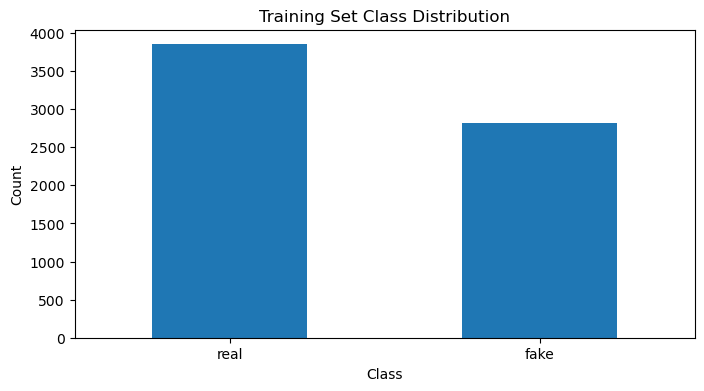

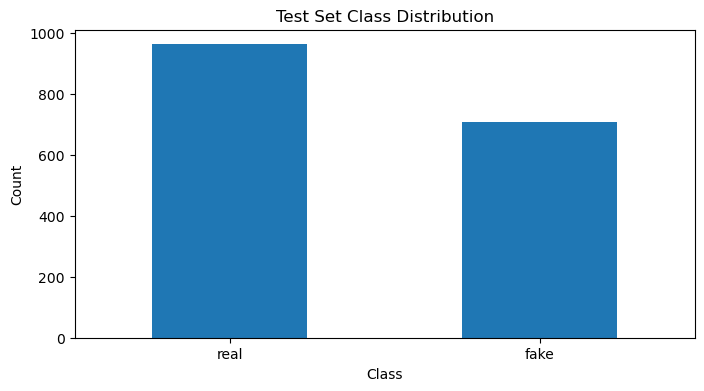

In [38]:
import matplotlib.pyplot as plt

def visualize_class_distribution(df, title):
    plt.figure(figsize=(8, 4))
    df['label'].value_counts().plot(kind='bar')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

visualize_class_distribution(train, 'Training Set Class Distribution')
visualize_class_distribution(test, 'Test Set Class Distribution')

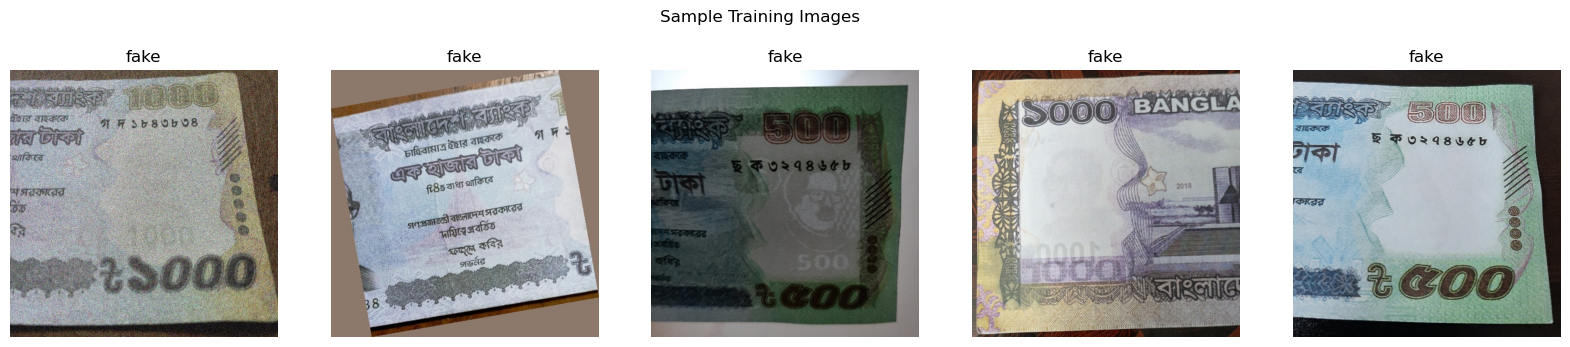

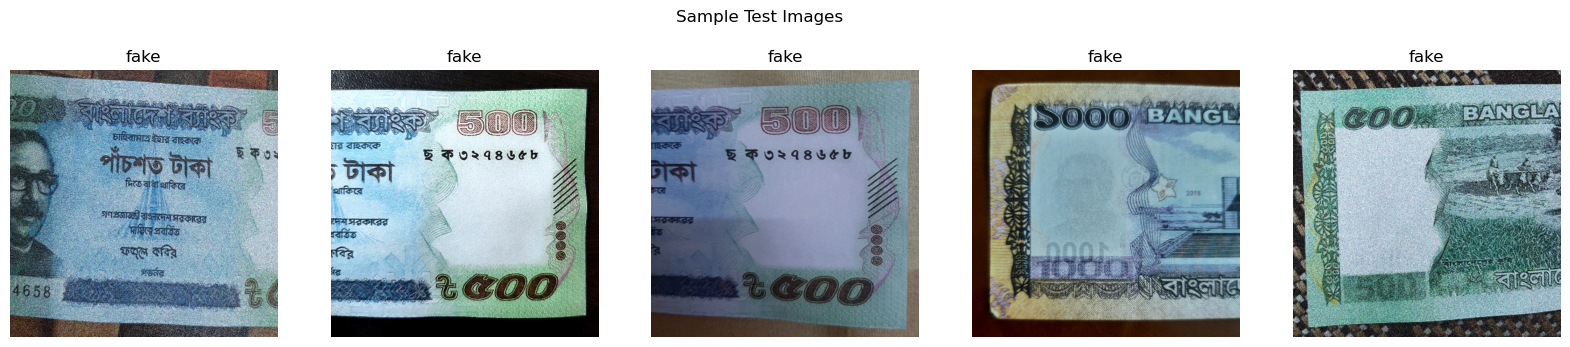

In [39]:
def display_sample_images(df, title, n=5):
    fig, axes = plt.subplots(1, n, figsize=(20, 4))
    sample_images = df.groupby('label').sample(n, random_state=1)
    for ax, (_, row) in zip(axes, sample_images.iterrows()):
        img = Image.open(row['filename'])
        ax.imshow(img)
        ax.set_title(row['label'])
        ax.axis('off')
    plt.suptitle(title)
    plt.show()

display_sample_images(train, 'Sample Training Images')
display_sample_images(test, 'Sample Test Images')


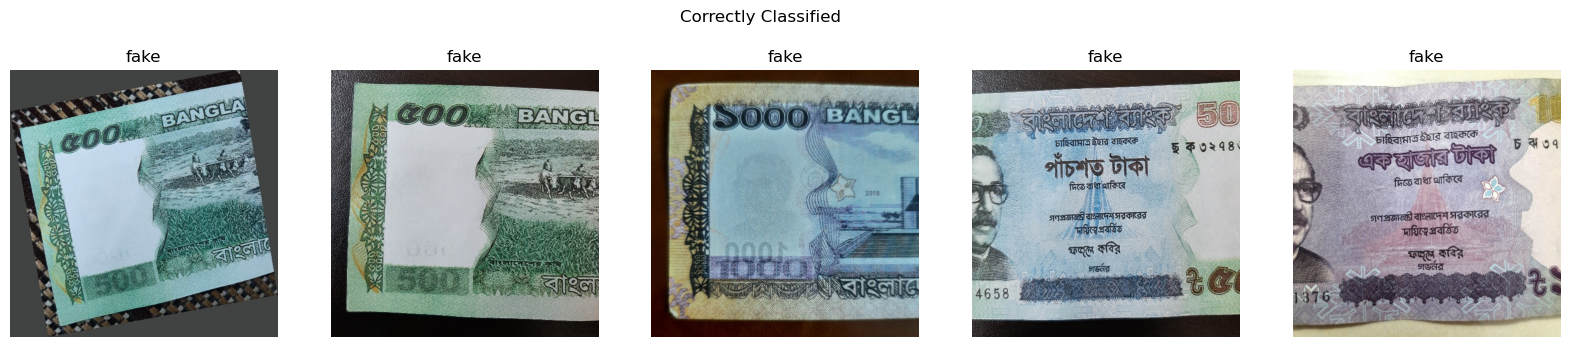

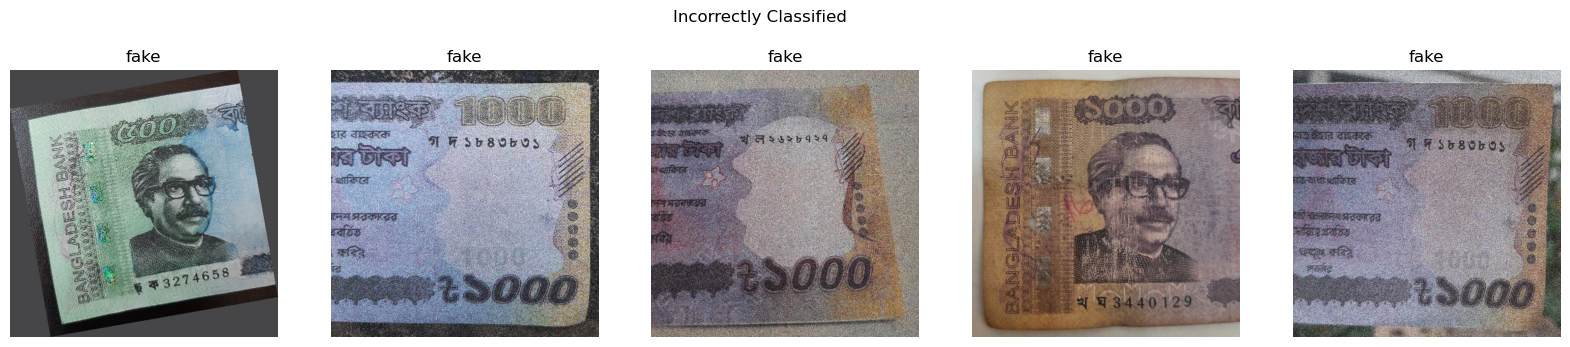

In [40]:
def display_prediction_results(df, correct=True, n=5):
    if correct:
        matched = df[df['label'] == df['prediction']]
        title = "Correctly Classified"
    else:
        matched = df[df['label'] != df['prediction']]
        title = "Incorrectly Classified"
    
    display_sample_images(matched, title, n)

display_prediction_results(test, correct=True)
display_prediction_results(test, correct=False)

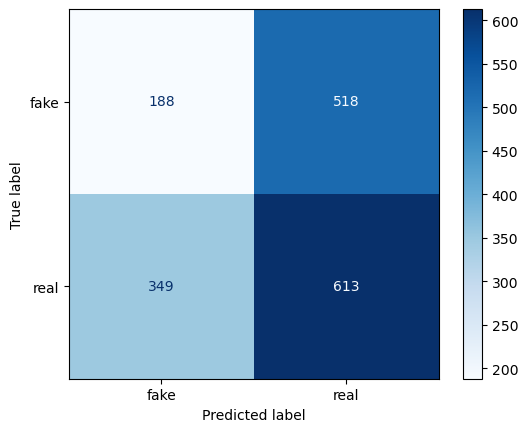

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

plot_confusion_matrix(test['label'], test['prediction'], classes)

# DenseNet169 Enhanced

In [42]:
import tensorflow as tf
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the DenseNet169 model without the top layer
base_model = tf.keras.applications.DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Assuming the class names are the same
classes = ["fake", "real"]

In [43]:
def prepare_dataset(directory_path):
    Id = []
    for dirname, _, filenames in os.walk(directory_path):
        for filename in filenames:
            Id.append(os.path.join(dirname, filename))
    df = pd.DataFrame()
    df = df.assign(filename=Id)
    df['label'] = df['filename'].str.replace(directory_path, '')
    df['label'] = df['label'].str.split('/').str[0]
    return df

train = prepare_dataset('/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/train/')
test = prepare_dataset('/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/test/')

In [44]:
def get_enhanced_classifier_model():
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(classes), activation='softmax')
    ])
    return model

classifier_model = get_enhanced_classifier_model()

# Compile the model
classifier_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

# Assuming you have a function to load and preprocess your dataset for training and validation
# train_data, val_data = load_and_preprocess_data()

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

In [45]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import classification_report
import numpy as np
import os

# Load the DenseNet169 model without the top layer
base_model = tf.keras.applications.DenseNet169(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

In [46]:
def get_enhanced_classifier_model():
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(2, activation='softmax')  # Assuming 2 classes: "fake" and "real"
    ])
    return model

In [47]:
classifier_model = get_enhanced_classifier_model()

# Compile the model
classifier_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

In [48]:
# Directory paths
train_dir = '/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/train/'
test_dir = '/kaggle/input/noteshieldbd-bangladeshi-banknote-authentication/test/'

In [49]:
# Data Augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Use 20% of the data for validation
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [50]:
# Data generator for validation and test set without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

# Train data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # 'binary' if you have binary classes
    subset='training'
)

# Validation data generator
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # 'binary' if you have binary classes
    subset='validation'
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')

# Train the model
history = classifier_model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Found 5338 images belonging to 2 classes.
Found 1334 images belonging to 2 classes.
Epoch 1/30
167/167 [==============================] - 118s 633ms/step - loss: 0.8828 - accuracy: 0.6476 - val_loss: 0.4559 - val_accuracy: 0.7939
Epoch 2/30
167/167 [==============================] - 98s 585ms/step - loss: 0.5855 - accuracy: 0.7615 - val_loss: 0.3998 - val_accuracy: 0.8306
Epoch 3/30
167/167 [==============================] - 100s 598ms/step - loss: 0.5151 - accuracy: 0.8024 - val_loss: 0.3646 - val_accuracy: 0.8801
Epoch 4/30
167/167 [==============================] - 98s 587ms/step - loss: 0.4806 - accuracy: 0.8134 - val_loss: 0.3081 - val_accuracy: 0.8883
Epoch 5/30
167/167 [==============================] - 98s 590ms/step - loss: 0.4264 - accuracy: 0.8378 - val_loss: 0.2598 - val_accuracy: 0.9063
Epoch 6/30
167/167 [==============================] - 100s 598ms/step - loss: 0.4017 - accuracy: 0.8505 - val_loss: 0.2959 - val_accuracy: 0.9010
Epoch 7/30
167/167 [=======================

In [51]:
# Load the best model
classifier_model.load_weights('best_model.h5')

# Test data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # 'binary' if you have binary classes
    shuffle=False
)

# Evaluate the model
test_loss, test_acc = classifier_model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

# Predict on test data
predictions = classifier_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

Found 1668 images belonging to 2 classes.
53/53 [==============================] - 11s 203ms/step - loss: 0.1193 - accuracy: 0.9676
Test accuracy: 0.9676
53/53 [==============================] - 11s 155ms/step


In [52]:

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

              precision    recall  f1-score   support

        fake       0.97      0.95      0.96       706
        real       0.97      0.98      0.97       962

    accuracy                           0.97      1668
   macro avg       0.97      0.97      0.97      1668
weighted avg       0.97      0.97      0.97      1668



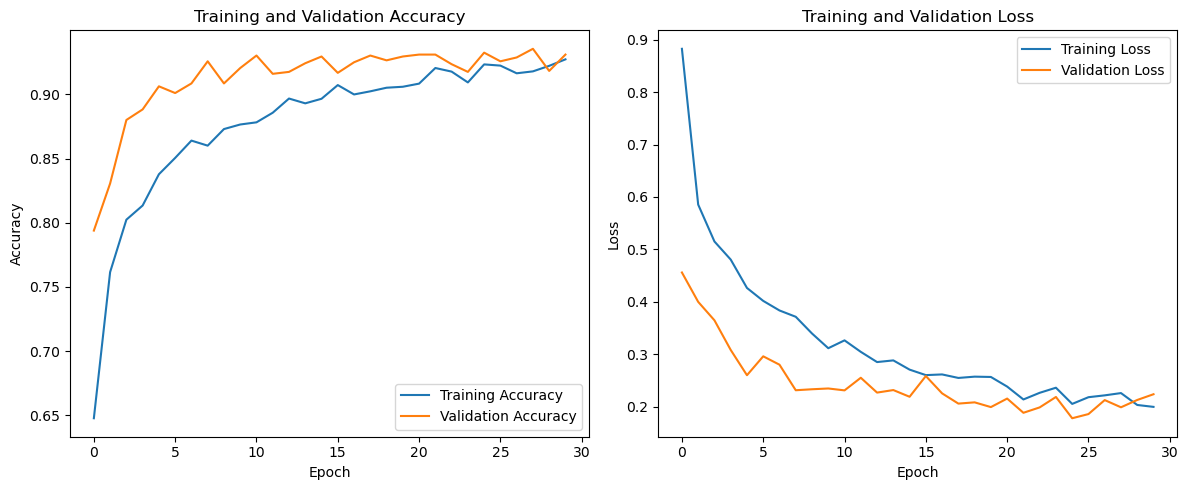

In [53]:
def plot_training_history(history):
    # Accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming 'history' is the history object returned by the 'fit' method
plot_training_history(history)

# EfficientNet B4